In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [4]:
with open("test_set_17_227.pkl", "rb") as handle:
    temp_faces = pickle.load(handle)
faces = {name.split()[-1]: temp_faces[name] for name in temp_faces}

In [11]:
data = pd.read_csv("MTurker_Results_0407.csv")

## classifier saliency

In [7]:
with open("new_true_class_saliency_mask_trial2_10.pkl", "rb") as handle:
    temp_saliency_masks = pickle.load(handle)
saliency_masks = {name.split()[-1]: temp_saliency_masks[name] for name in temp_saliency_masks}

In [8]:
saliency_meanmap = np.zeros((227,227))
count = 0
for name in saliency_masks:
    saliency_meanmap += saliency_masks[name].sum(axis=0)
    count += saliency_masks[name].shape[0]
saliency_meanmap = saliency_meanmap / count

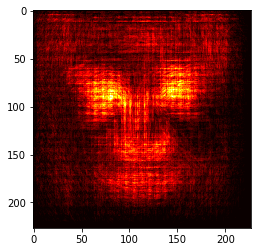

In [9]:
# average saliency across all faces
plt.imshow(saliency_meanmap, cmap='hot', vmin=0.0)

## Turker Saliency

In [25]:
meanmap = np.zeros((227,227))
for rowx in data.iterrows():
    row=rowx[1]
    meanmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
meanmap = meanmap / data.shape[0]

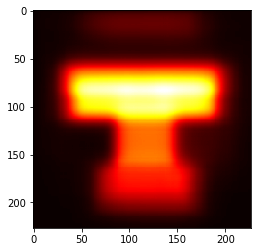

In [26]:
plt.imshow(meanmap, cmap='hot', vmin=0.0)

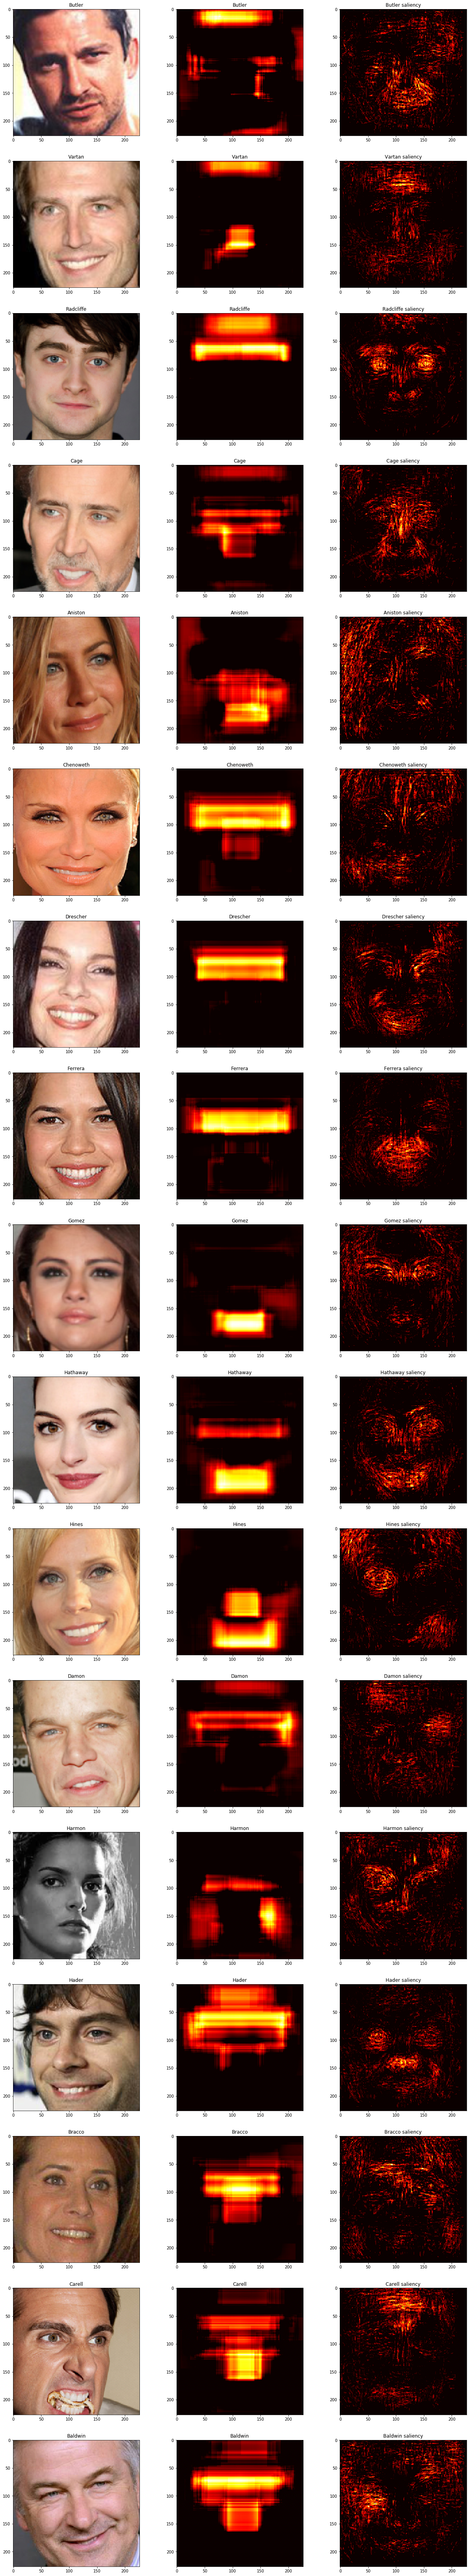

In [30]:
fig, axs = plt.subplots(17, 3, figsize=(21,119))
for i,star in enumerate(data.last_name.unique()):
    # plot an example of the test image
    axs[i,0].set_title(star)
    axs[i,0].imshow(faces[star][12]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0] - meanmap

    axs[i,1].set_title(star)
    axs[i,1].imshow(heatmap, cmap='hot', vmin=0.0)
    
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0] - saliency_meanmap
    axs[i,2].set_title(f"{star} saliency")
    axs[i,2].imshow(saliency_heatmap, cmap='hot', vmin=0.0)

In [28]:
plt.close()